# Modelo SIR CON MUERTES

### Jesús Andrés Arrieta Villamizar - 2208058

El modelo SIR con muertes considera el fallecimiento por enfermedad dentro de la población al estar infectados con la enfermedad. Adicionalmente, con el fin de mantener la población constante, se asume que las personas que fallecen son las mismas que nacen y viene dado por la expresiones 
 
 $$\frac {dS}{dt}=  -\beta SI ,\quad  
 \frac {dI}{dt}=  \beta SI - \gamma I, \quad
 \frac {dR}{dt}=  \gamma I, \quad
 \frac{dM}{dt} = \theta I,$$ 

donde $\beta, \gamma$,  y $\theta$ representan la tasa de infección, de recuperación, de mortalidad por causas de la enfermedad, respectivamente. 
En primera instancia se definen los valores iniciales de I,S y los parámetros de cada ecuación diferencial.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def modelo(S, I, R, M, beta, gamma, theta, dt):
    """ 1. En primera instancia, definimos el valor de cada una de las variables para un conjunto
        de condiciones iniciales dadas. A partir de estos valores, la variables evolucionarán 
        en el tiempo mediante un método explicito. Es decir, conociendo su valor y su derivada en un punto
        es posible conocer su valor en el punto siguiente. """  
    
    #-----------------------------------------------------------
    dS = ( -beta*I*S ) * dt
    S_p = S + dS
    #-----------------------------------------------------------    
    dI = ( beta*I*S - gamma*I ) * dt
    I_p = I + dI
    #-----------------------------------------------------------    
    dR = ( gamma*I ) * dt
    R_p = R + dR
    #-----------------------------------------------------------    
    dM = ( theta*I ) * dt
    M_p = M + dM
    #-----------------------------------------------------------    
    return S_p, I_p, R_p, M_p

In [3]:
def function_plot(x,S,I,R,M,beta,theta,gamma):
    # Dimensiones del gráfico
    plt.figure(figsize = (8,6))
    plt.subplot(111)

    # usar LaTeX fonts en el gráfico
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    # Plot de las cuatro soluciones
    plt.plot(x,S,"r",label = "Susceptibles")
    plt.plot(x,I,"g",linestyle = "-.",label = "Infectados")
    plt.plot(x,R,"b",linestyle = ":",label = "Expuestos")
    plt.plot(x,M,"k",label = "Muertos")

    # label y título
    plt.xlabel(r'\textbf{Tiempo}', fontsize=18)
    plt.ylabel(r'\textbf{Poblacion}', fontsize=18)
    plt.title(r'$\beta = {} \quad \theta = {} \quad \gamma = {}$' .format(beta, theta, gamma) )
    plt.suptitle(r'\textbf{Modelo SIR con muertes}', fontsize=16, color='green')

    # límites de los gráficos
    plt.xlim(x.min()*1.1, x.max()*1.1)
    plt.legend()

In [4]:
def main(beta, gamma, theta, tmax, dt):
    
    "2.En primera instancia se definen los valores iniciales de las variables."

    #--------------Condiciones iniciales-------------------
    S = [0.95]
    I = [0.05]
    R = [0]
    M = [0]
    
    "3. Ahora se crea el ciclo iterativo en el cual se irán calculando la solución paso a paso"
    x = np.arange(0,tmax + dt,dt)
    
    for i in range(x.size -1 ):
        S_p, I_p, R_p, M_p = modelo(S[i],I[i],R[i],M[i],beta, gamma, theta, dt)
    
        S.append(S_p)
        I.append(I_p)    
        R.append(R_p)
        M.append(M_p)
    
    function_plot(x,S,I,R,M,beta,theta,gamma)

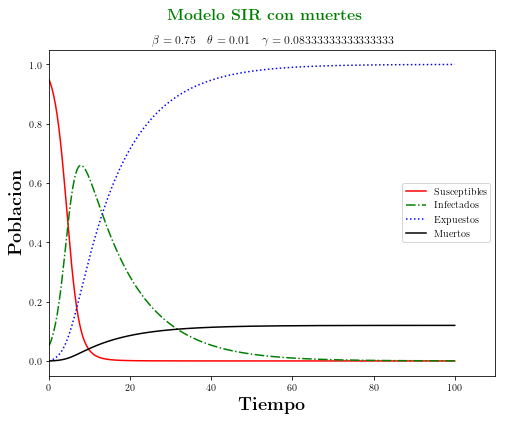

In [7]:
main(beta = 6/8, gamma = 1/12, theta = 0.01, tmax= 100, dt = 0.2)

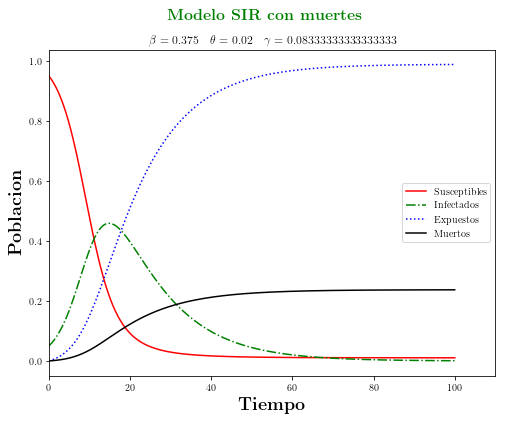

In [8]:
main(beta = 3/8, gamma = 1/12, theta = 0.02, tmax= 100, dt = 0.2)